In [47]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
from tqdm.notebook import tqdm
import subprocess
import time

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [6, 3]

# Python implementation

In [48]:
def triplet_distance(ps, rs):
    
    n_elts = rs.shape[0]
    n_triplets = n_elts*(n_elts-1)*(n_elts-2)/6
 
    d = 0
    for k in np.arange(0, n_elts-2):
        for l in np.arange(k+1, n_elts-1):
            for m in np.arange(l+1, n_elts):
                if rs[k, l]>=rs[l, m]:
                    if ps[k, l]>=ps[l, m]:
                        d+=1
                else:
                    if ps[k, l]<ps[l, m]:
                        d+=1
    return d/n_triplets

# Compiling cpp implementation

In [49]:
!./compile.sh

# Benchmark

In [50]:

np.random.seed(0)

max_log_n = 9

python_duration = []
c_duration = []
error = 0

for k in tqdm(range(max_log_n)):
    n_elts = np.power(2, k+2)
    
    reference = squareform(pdist(np.random.random((n_elts, 10))))
    prediction = squareform(pdist(np.random.random((n_elts, 10))))

    np.savetxt('reference.csv', reference, delimiter=',')
    np.savetxt('predicted.csv', prediction, delimiter=',')

    t = time.time()
    p_distance = triplet_distance(reference, prediction)
    python_duration.append(time.time()-t)

    t = time.time()
    c_distance = float(subprocess.check_output(['./tripletMatrixDistance', 'reference.csv', 'predicted.csv']))
    c_duration.append(time.time()-t)

    error += p_distance-c_distance

print(error)


  0%|          | 0/9 [00:00<?, ?it/s]

0.40595430458531007


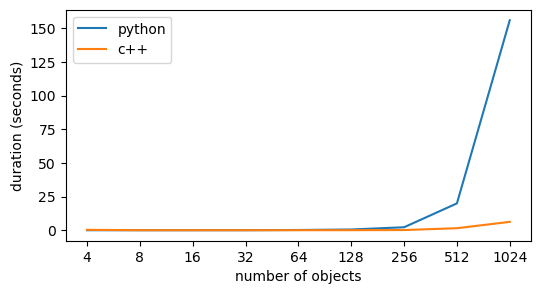

In [51]:

plt.plot(python_duration)
plt.plot(c_duration)
plt.xticks(range(max_log_n), np.power(2, np.arange(max_log_n)+2))
plt.xlabel('number of objects')
plt.ylabel('duration (seconds)')
plt.legend(['python', 'c++'])
plt.savefig('assets/benchmark.png', bbox_inches = 'tight')
plt.show()
